In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.metrics import geometric_mean_score

In [2]:
def create_dataset(n_samples=5000, weights = (0.5,0.5), n_classes=2,
                   class_sep=0.8, n_clusters = 1):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)

In [3]:
def plot_resampling(X, y, sampling, ax):
    X_res, y_res = sampling.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor='k')
    # make nice plotting
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    return Counter(y_res)

In [4]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

In [5]:
#Membuat toy dataset

from sklearn.model_selection import train_test_split
X, y = create_dataset (n_samples=5000, weights = (0.92, 0.08), class_sep=0.8)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# X_train = X_train.values
# y_train = y_train.values
# X_test = X_test.values
# y_test = y_test.values
print ("Komponen dataset sebelum undersampling = {}" .format(Counter(y)))

#Undersampling Dataset
sampler = EditedNearestNeighbours(random_state = 0, sampling_strategy='all')
X_enn, y_enn = sampler.fit_resample (X_train , y_train)

#Train dataset dengan classifier
clf_logreg = LogisticRegression(C=0.1, penalty='l1')
clf_logreg.fit(X_enn,y_enn)

clf_knn = KNeighborsClassifier(n_neighbors=3, algorithm='auto', metric='euclidean')
clf_knn.fit(X_enn, y_enn)

clf_svm = SVC(gamma=2, C=1)

clf_svm.fit(X_enn, y_enn)
clf_dt = DecisionTreeClassifier(max_depth=5)
clf_dt.fit(X_enn, y_enn)

clf_rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features='auto')
clf_rf.fit(X_enn, y_enn)

print ("Komponen dataset setelah undersampling = {}" .format(Counter(y_enn)))

print ("Komponen training set = {}" .format(Counter(y_train)))
print ("Komponen testing set = {}" .format(Counter(y_test)))



Komponen dataset sebelum undersampling = Counter({0: 4582, 1: 418})


c:\users\muhsin ahadi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Komponen dataset setelah undersampling = Counter({0: 3585, 1: 284})
Komponen training set = Counter({0: 3663, 1: 337})
Komponen testing set = Counter({0: 919, 1: 81})


c:\users\muhsin ahadi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


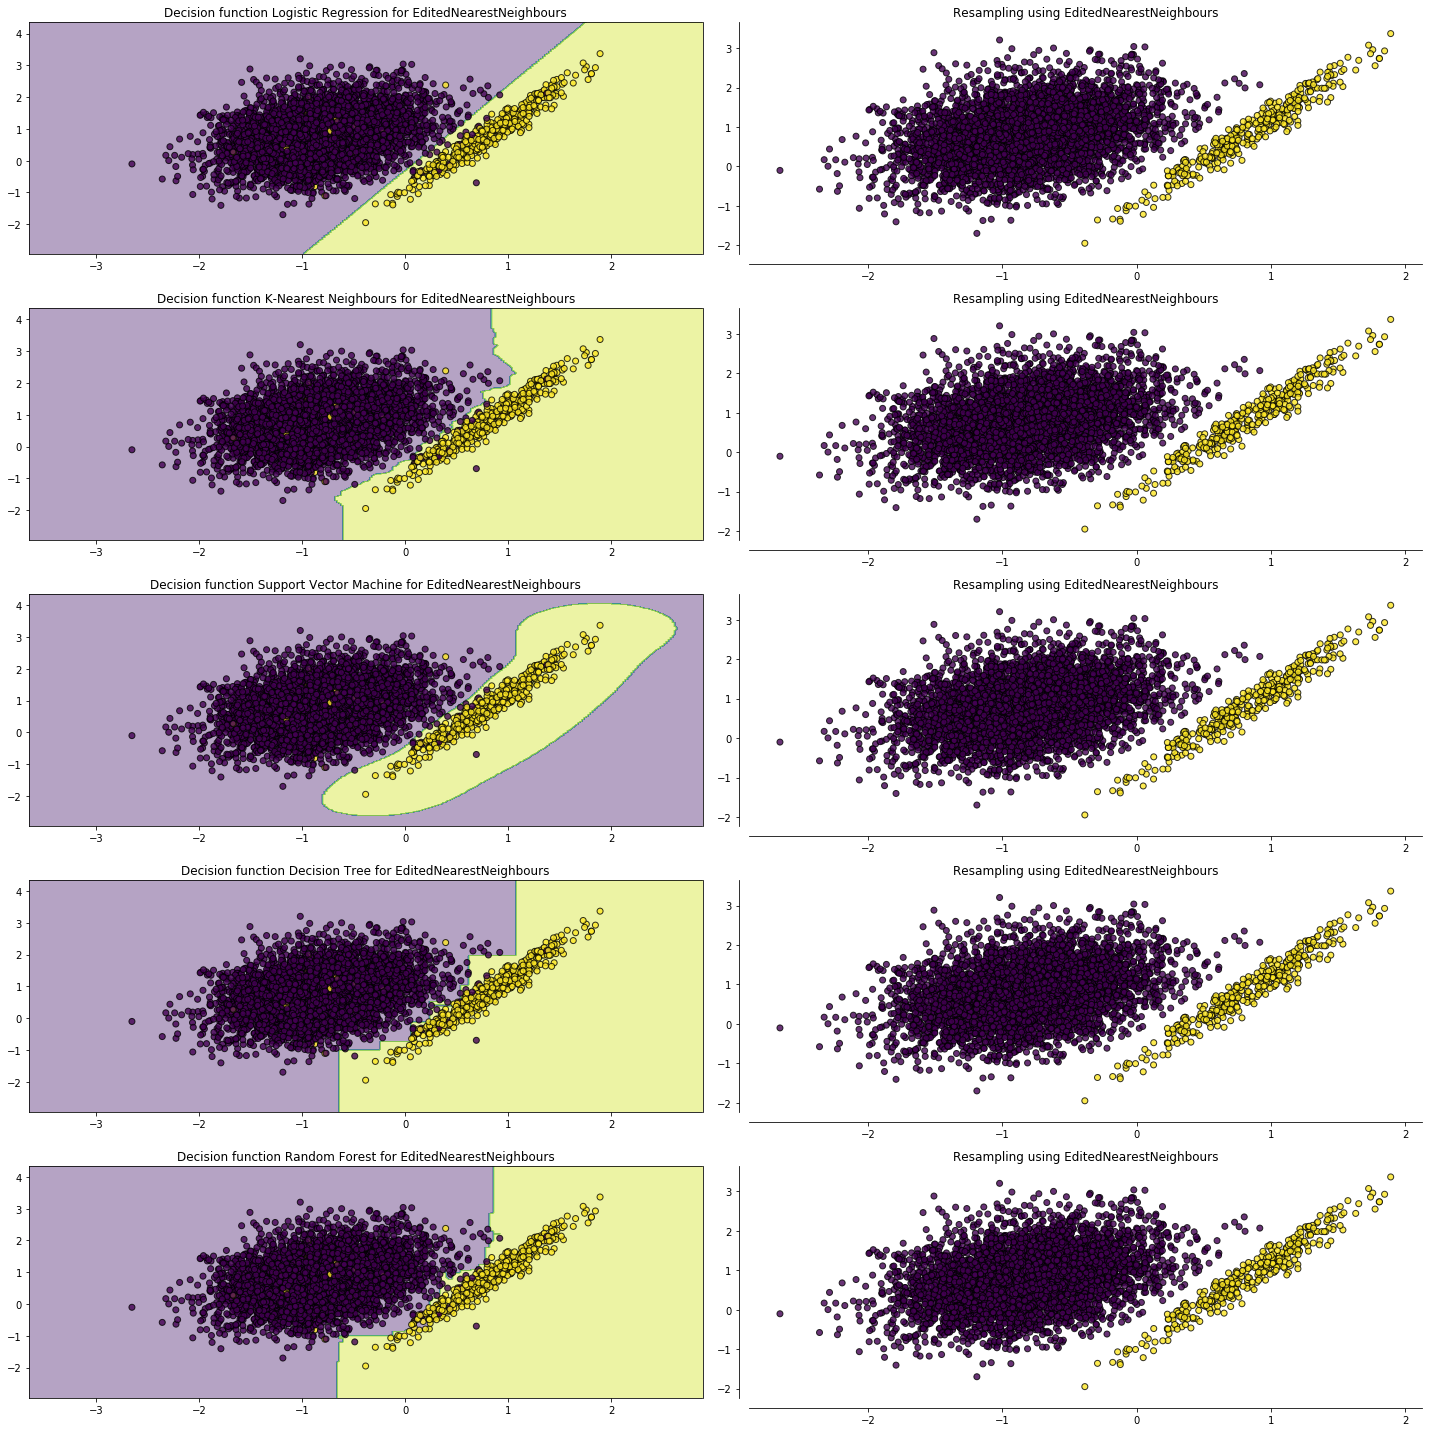

In [6]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6), (ax7,ax8), (ax9,ax10)) = plt.subplots(5,2, figsize = (20,20))

# classifiers = [clf_logreg, clf_knn]
ax_arr = ((ax1,ax2), (ax3,ax4), (ax5,ax6), (ax7,ax8), (ax9,ax10))
names = ["Logistic Regression", "K-Nearest Neighbours", "Support Vector Machine", "Decision Tree", "Random Forest"]


for ax, name, classifier in zip (ax_arr, names,  (clf_logreg, clf_knn, clf_svm, clf_dt, clf_rf)):
    clf = make_pipeline (sampler, classifier)
    clf.fit(X,y)
    
    plot_decision_function(X, y, clf, ax[0])
    ax[0].set_title('Decision function {} for {}'.format(name,
        sampler.__class__.__name__))
    plot_resampling(X, y, sampler, ax[1])
    ax[1].set_title('Resampling using {}'.format(
        sampler.__class__.__name__))
fig.tight_layout()
#LogReg
# clf = make_pipeline (sampler, clf_logreg)

# clf.fit (X,y)

# plot_decision_function (X, y, clf, ax1)
# ax1.set_title ('Decision function for {}'.format(sampler.__class__.__name__))

# plot_resampling (X, y, sampler, ax2)
# ax2.set_title('Resampling using {}' .format(sampler.__class__.__name__))
# #KNN
# clf = make_pipeline (sampler, clf_knn)

# clf.fit (X,y)

# plot_decision_function (X, y, clf, ax3)
# ax1.set_title ('Decision function for {}'.format(sampler.__class__.__name__))

# plot_resampling (X, y, sampler, ax4)
# ax2.set_title('Resampling using {}' .format(sampler.__class__.__name__))

# fig.tight_layout()


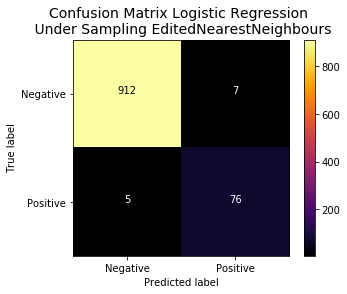

In [7]:
from sklearn.metrics import confusion_matrix

#Menerapkan confusion matrix pada testing set
y_pred_log_reg = clf_logreg.predict(X_test)


#log
#mengganti testing setnya dengan testing set untuk data keseluruhan
log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)

import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
labels = ['Negative', 'Positive']

fig = plt.figure(figsize=(5,4))

plot_confusion_matrix(log_reg_cf, labels, title="Confusion Matrix Logistic Regression \n Under Sampling {}" .format(sampler.__class__.__name__) , cmap=plt.cm.inferno)

In [8]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
##Logistic Regression
print ("Pengukuran Performa Training Set hasil ENN: \n")
y_pred_logreg = clf_logreg.predict(X_enn)

print ('Classification Report Logistic Regression:')
print('Recall Score: {:.2f}'.format(recall_score(y_enn, y_pred_logreg)))
print('Precision Score: {:.2f}'.format(precision_score(y_enn, y_pred_logreg)))
print('F1 Score: {:.2f}'.format(f1_score(y_enn, y_pred_logreg)))

G_mean_under_sampling_enn = geometric_mean_score (y_enn, y_pred_logreg)

print ("G-Mean untuk Logistic Regresion with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

#KNearest Neighbor
y_pred_knn = clf_knn.predict(X_enn)

print ('\nClassification Report K Nearest Neighbor:')
print('Recall Score: {:.2f}'.format(recall_score(y_enn, y_pred_knn)))
print('Precision Score: {:.2f}'.format(precision_score(y_enn, y_pred_knn)))
print('F1 Score: {:.2f}'.format(f1_score(y_enn, y_pred_knn)))

G_mean_under_sampling_enn = geometric_mean_score (y_enn, y_pred_knn)

print ("G-Mean untuk K Nearest Neighbor with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

#SVM
y_pred_svm = clf_svm.predict(X_enn)

print ('\nClassification Report Support Vector Machine:')
print('Recall Score: {:.2f}'.format(recall_score(y_enn, y_pred_svm)))
print('Precision Score: {:.2f}'.format(precision_score(y_enn, y_pred_svm)))
print('F1 Score: {:.2f}'.format(f1_score(y_enn, y_pred_svm)))

G_mean_under_sampling_enn = geometric_mean_score (y_enn, y_pred_svm)

print ("G-Mean untuk Support Vector Machine with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

#Decision Tree
y_pred_dt = clf_dt.predict(X_enn)

print ('\nClassification Report Decision Tree:')
print('Recall Score: {:.2f}'.format(recall_score(y_enn, y_pred_dt)))
print('Precision Score: {:.2f}'.format(precision_score(y_enn, y_pred_dt)))
print('F1 Score: {:.2f}'.format(f1_score(y_enn, y_pred_dt)))

G_mean_under_sampling_enn = geometric_mean_score (y_enn, y_pred_dt)

print ("G-Mean untuk Decision Tree with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

#Random Forest
y_pred_rf = clf_rf.predict(X_enn)

print ('\nClassification Report Random Forest:')
print('Recall Score: {:.2f}'.format(recall_score(y_enn, y_pred_rf)))
print('Precision Score: {:.2f}'.format(precision_score(y_enn, y_pred_rf)))
print('F1 Score: {:.2f}'.format(f1_score(y_enn, y_pred_rf)))

G_mean_under_sampling_enn = geometric_mean_score (y_enn, y_pred_rf)

print ("G-Mean untuk Random Forest with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

Pengukuran Performa Training Set hasil ENN: 

Classification Report Logistic Regression:
Recall Score: 1.00
Precision Score: 0.99
F1 Score: 1.00
G-Mean untuk Logistic Regresion with EditedNearestNeighbours:  0.9997210210574808

Classification Report K Nearest Neighbor:
Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
G-Mean untuk K Nearest Neighbor with EditedNearestNeighbours:  1.0

Classification Report Support Vector Machine:
Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
G-Mean untuk Support Vector Machine with EditedNearestNeighbours:  1.0

Classification Report Decision Tree:
Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
G-Mean untuk Decision Tree with EditedNearestNeighbours:  1.0

Classification Report Random Forest:
Recall Score: 0.99
Precision Score: 1.00
F1 Score: 1.00
G-Mean untuk Random Forest with EditedNearestNeighbours:  0.9964726521480022


In [9]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print ("Pengukuran Performa terhadap Testing Set: \n")

##Logistic Regression
y_pred_logreg = clf_logreg.predict(X_test)

print ('Classification Report Logistic Regression:')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred_logreg)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred_logreg)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred_logreg)))

G_mean_under_sampling_enn = geometric_mean_score (y_test, y_pred_logreg)

print ("G-Mean untuk Logistic Regresion with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

#KNearest Neighbor
y_pred_knn = clf_knn.predict(X_test)

print ('\nClassification Report K Nearest Neighbor:')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred_knn)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred_knn)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred_knn)))

G_mean_under_sampling_enn = geometric_mean_score (y_test, y_pred_knn)

print ("G-Mean untuk K Nearest Neighbor with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

#SVM
y_pred_svm = clf_svm.predict(X_test)

print ('\nClassification Report Support Vector Machine:')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred_svm)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred_svm)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred_svm)))

G_mean_under_sampling_enn = geometric_mean_score (y_test, y_pred_svm)

print ("G-Mean untuk Support Vector Machine with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

#Decision Tree
y_pred_dt = clf_dt.predict(X_test)

print ('\nClassification Report Decision Tree:')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred_dt)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred_dt)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred_dt)))

G_mean_under_sampling_enn = geometric_mean_score (y_test, y_pred_dt)

print ("G-Mean untuk Decision Tree with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

#Random Forest
y_pred_rf = clf_rf.predict(X_test)

print ('\nClassification Report Random Forest:')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred_rf)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred_rf)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred_rf)))

G_mean_under_sampling_enn = geometric_mean_score (y_test, y_pred_rf)

print ("G-Mean untuk Random Forest with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

Pengukuran Performa terhadap Testing Set: 

Classification Report Logistic Regression:
Recall Score: 0.94
Precision Score: 0.92
F1 Score: 0.93
G-Mean untuk Logistic Regresion with EditedNearestNeighbours:  0.9649480885549082

Classification Report K Nearest Neighbor:
Recall Score: 0.94
Precision Score: 0.95
F1 Score: 0.94
G-Mean untuk K Nearest Neighbor with EditedNearestNeighbours:  0.966533871199992

Classification Report Support Vector Machine:
Recall Score: 0.94
Precision Score: 0.93
F1 Score: 0.93
G-Mean untuk Support Vector Machine with EditedNearestNeighbours:  0.9654769721728884

Classification Report Decision Tree:
Recall Score: 0.94
Precision Score: 0.94
F1 Score: 0.94
G-Mean untuk Decision Tree with EditedNearestNeighbours:  0.9660055662295562

Classification Report Random Forest:
Recall Score: 0.93
Precision Score: 0.95
F1 Score: 0.94
G-Mean untuk Random Forest with EditedNearestNeighbours:  0.9601540399527951
